# Final Capstone
 - Use the dataset UsArrests.csv included in this folder to generate a similar
in-depth PCA report of the data. Explore as much as you can, motivate the
pre-processing steps you take, and interpret the outcomes of any analyses.
 - You are also required to do an application of two clustering techniques and
an analysis of the clusters they generate. Try and see if you can find anything
common within each cluster that has been found.

In [11]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [12]:
df= pd.read_csv("UsArrests.csv")

<Axes: >

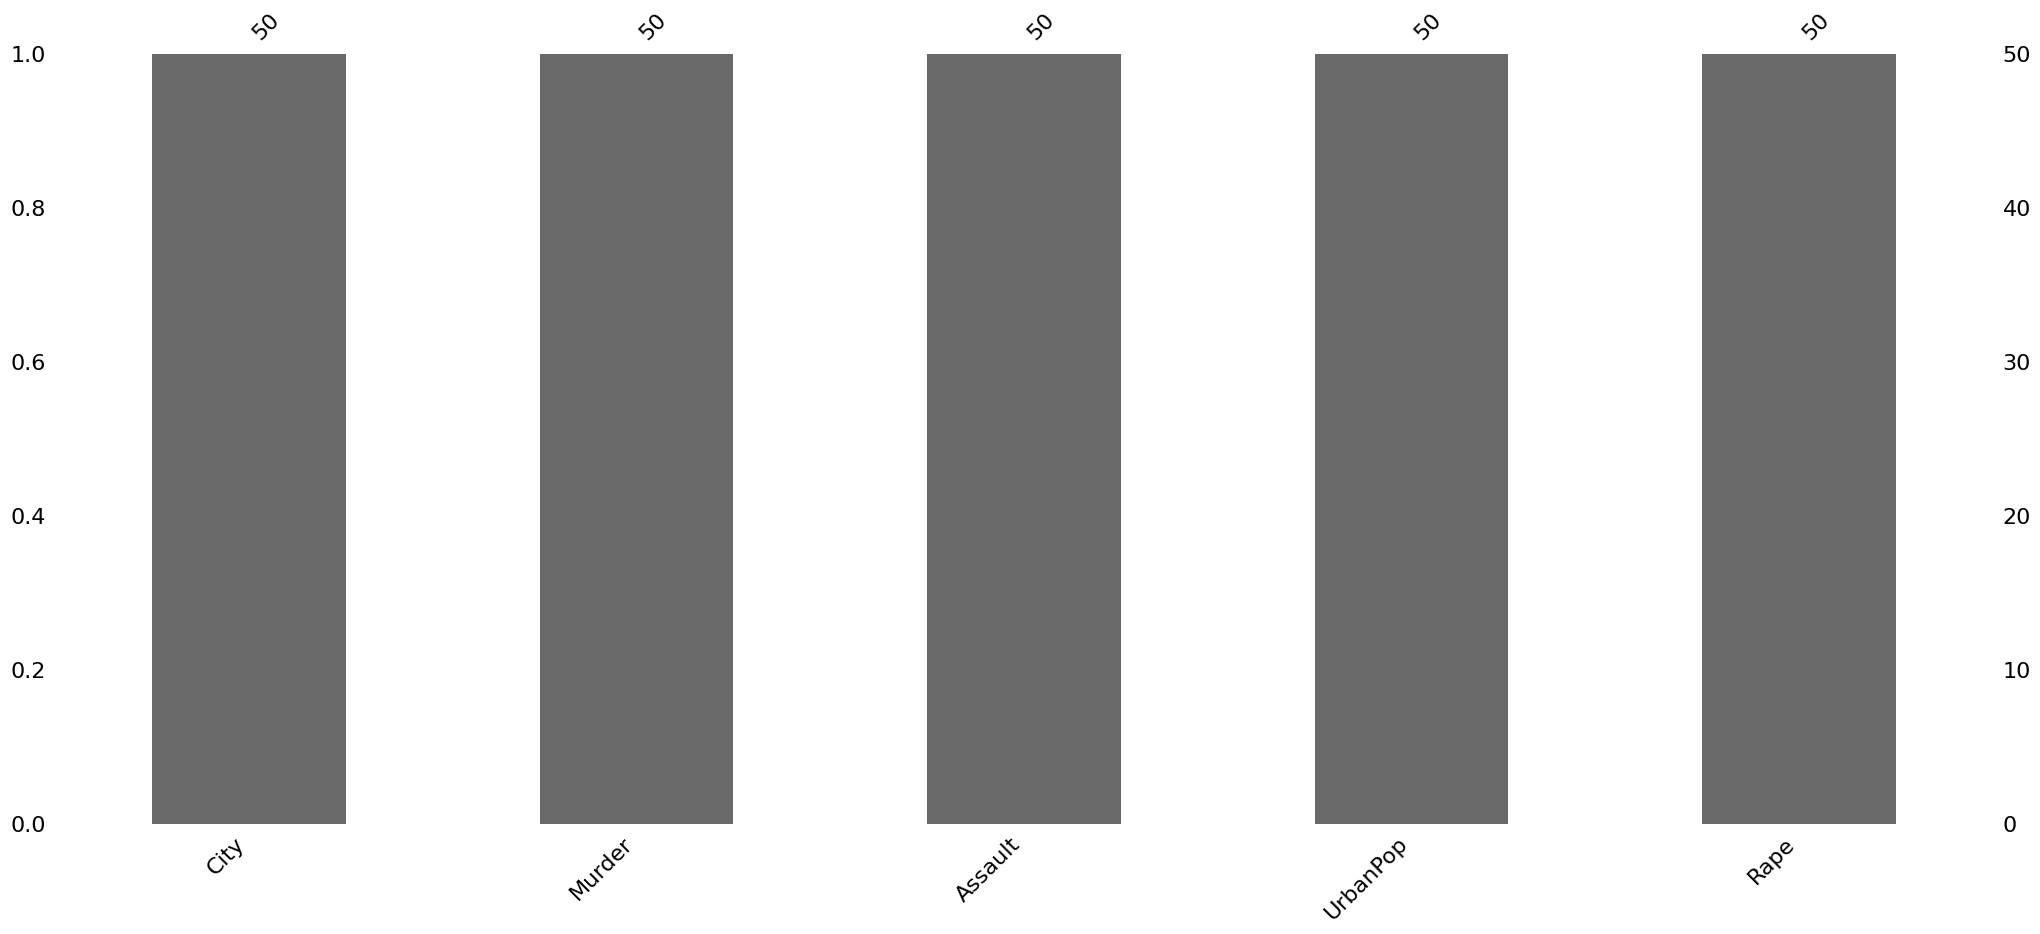

In [13]:
# check for missing data 
msno.bar(df)

There is no missing data.


In [14]:
# check data types for each column
df.dtypes

City         object
Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

In [15]:
# the city column represents the name each state in the USA so renaming the column is needed
df.rename(columns={'City':'State'},inplace=True)
df.set_index(df.State,inplace=True)
df.drop('State',axis=1,inplace=True)
df.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


<function matplotlib.pyplot.show(close=None, block=None)>

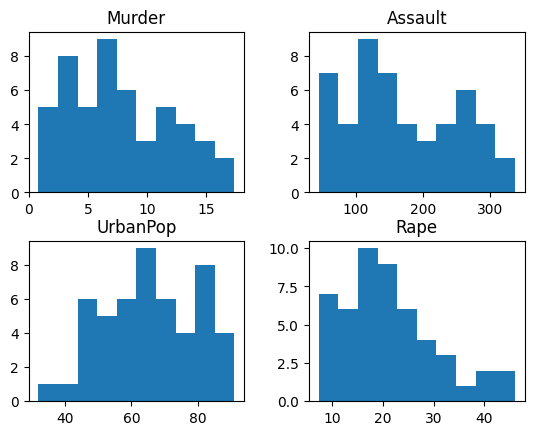

In [17]:
# plot the disribution of data for each column
df.hist(grid=False)
plt.show

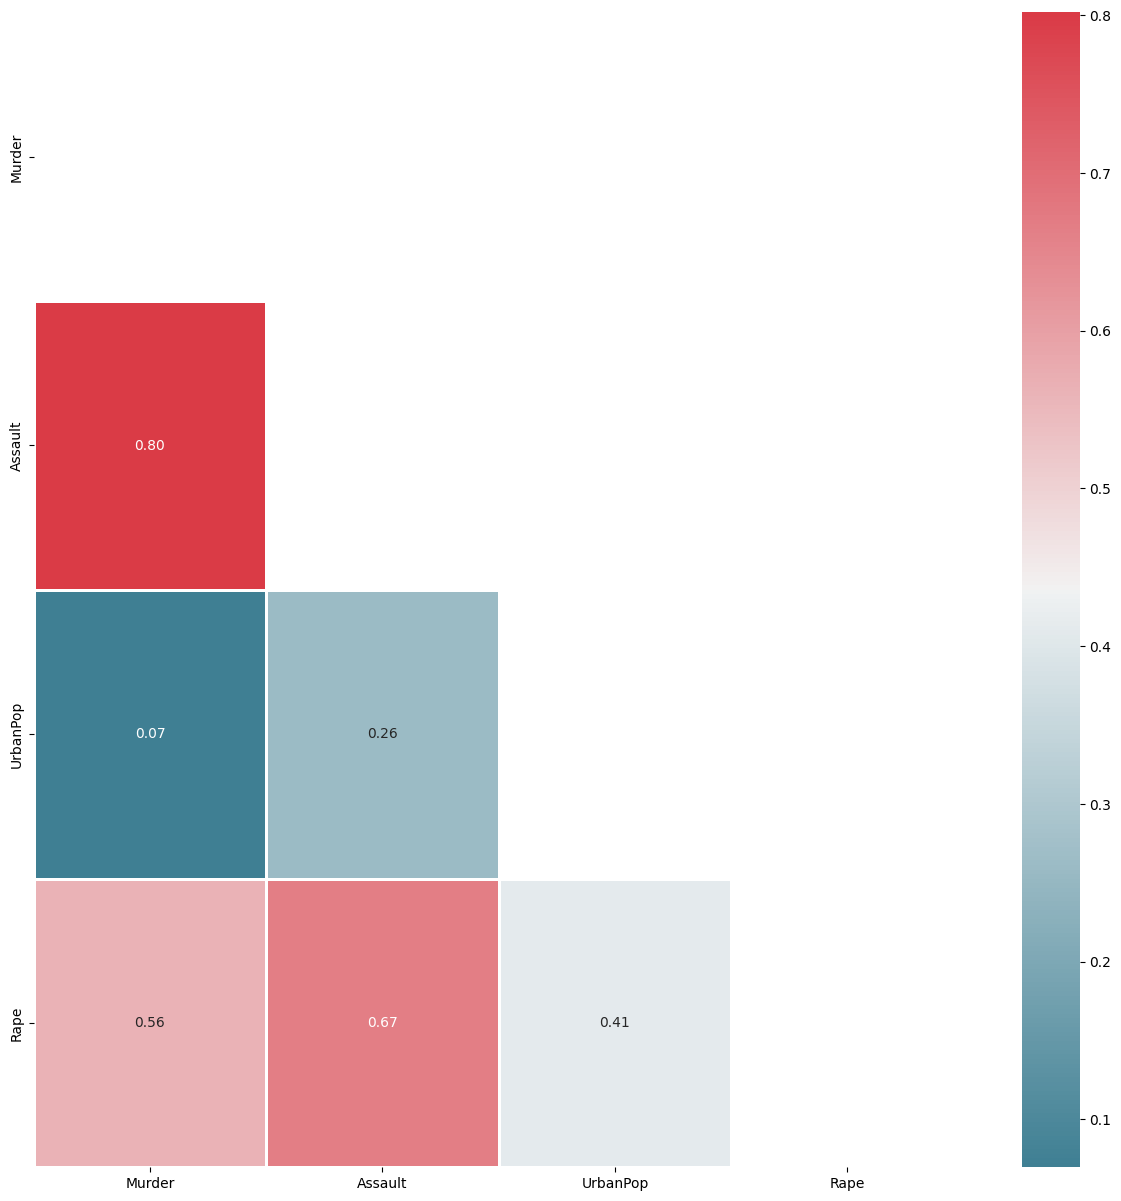

In [18]:
# display heat map of correlation 
corr = df.corr()
colormap = sns.diverging_palette(220, 10, as_cmap=True)
fig, ax = plt.subplots(figsize=(15, 15))

# to mask mirrored side of heatmap
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True

# Generate Heat Map, with annotations of the correlation strength and 2-decimal floats
ax = sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf, linewidth=2)

plt.show()

By examining the correlations between variables in the plot above, we can gain valuable insights into our data. The color-coding scheme makes it easy to identify strongly correlated variables, which are represented with darker shades, while variables with little correlation are depicted with paler tones.

The plot indicates a significant positive correlation between the murder rate and the assault rate, which is logical given that assault can often escalate to murder, particularly in cases of 1st Degree Aggravated Assault, one of the most severe forms of assault. Moreover, there is a negative correlation between murder rate and urban population percentage, implying that an increase in one variable would lead to a decrease in the other. The plot also demonstrates a strong correlation between assault and rape rates.

The presence of robust positive and negative correlations in our data suggests that the dataset is a good fit for Principal Component Analysis (PCA). By applying PCA, we can identify a reduced set of variables that encode similar kinds of variations between countries, requiring fewer dimensions.


In [20]:
#get values from data frame
x = df.values

# do principle component analysis
pca = PCA()
p_comp = pca.fit_transform(x)
df_pca = pd.DataFrame(p_comp, index=df.index)
df_pca

,0,1,2,3
State,,,,
Alabama,64.802164,11.448007,-2.494933,2.407901
Alaska,92.827450,17.982943,20.126575,-4.094047
Arizona,124.068216,-8.830403,-1.687448,-4.353685
Arkansas,18.340035,16.703911,0.210189,-0.520994
California,107.422953,-22.520070,6.745873,-2.811826
Colorado,34.975986,-13.719584,12.279363,-1.721464
Connecticut,-60.887282,-12.932530,-8.420657,-0.699902
Delaware,66.731025,-1.353798,-11.280957,-3.727981
Florida,165.244370,-6.274690,-2.997933,1.247681


In [24]:
# check standard devitation, variance proportion and variance ratio of each principle componant
pd.DataFrame([df_pca.describe().transpose()["std"].values,pca.explained_variance_,pca.explained_variance_ratio_],
             index=["Standard Deviation","Cumulative Proportion","Proportion of Variance Explained"])

,0,1,2,3
Standard Deviation,83.732400,14.212402,6.489426,2.482790
Cumulative Proportion,7011.114851,201.992366,42.112651,6.164246
Proportion of Variance Explained,0.965534,0.027817,0.005800,0.000849


In [26]:
pc1 = abs( pca.components_[0])
pc2 = abs( pca.components_[1])
pc3 = abs( pca.components_[2])
pc4 = abs( pca.components_[3])

feature_importance = {"PC1_Importance":pc1,
                      "PC2_Importance":pc2,
                      "PC3_Importance":pc3,
                      "PC4_Importance":pc4
                     }
feat_df = pd.DataFrame(feature_importance,index=df.columns)
feat_df

,PC1_Importance,PC2_Importance,PC3_Importance,PC4_Importance
Murder,0.041704,0.044822,0.079891,0.994922
Assault,0.995221,0.058760,0.067570,0.038938
UrbanPop,0.046336,0.976857,0.200546,0.058169
Rape,0.075156,0.200718,0.974081,0.072325


In [29]:
def biplot(score,coeff,labels=None,points=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    fig, ax = plt.subplots(figsize=(20,15))    

    ax.scatter(xs * scalex,ys * scaley,s=5)

    for i in range(0,len(xs)):
        txt = df.index[i]
        ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

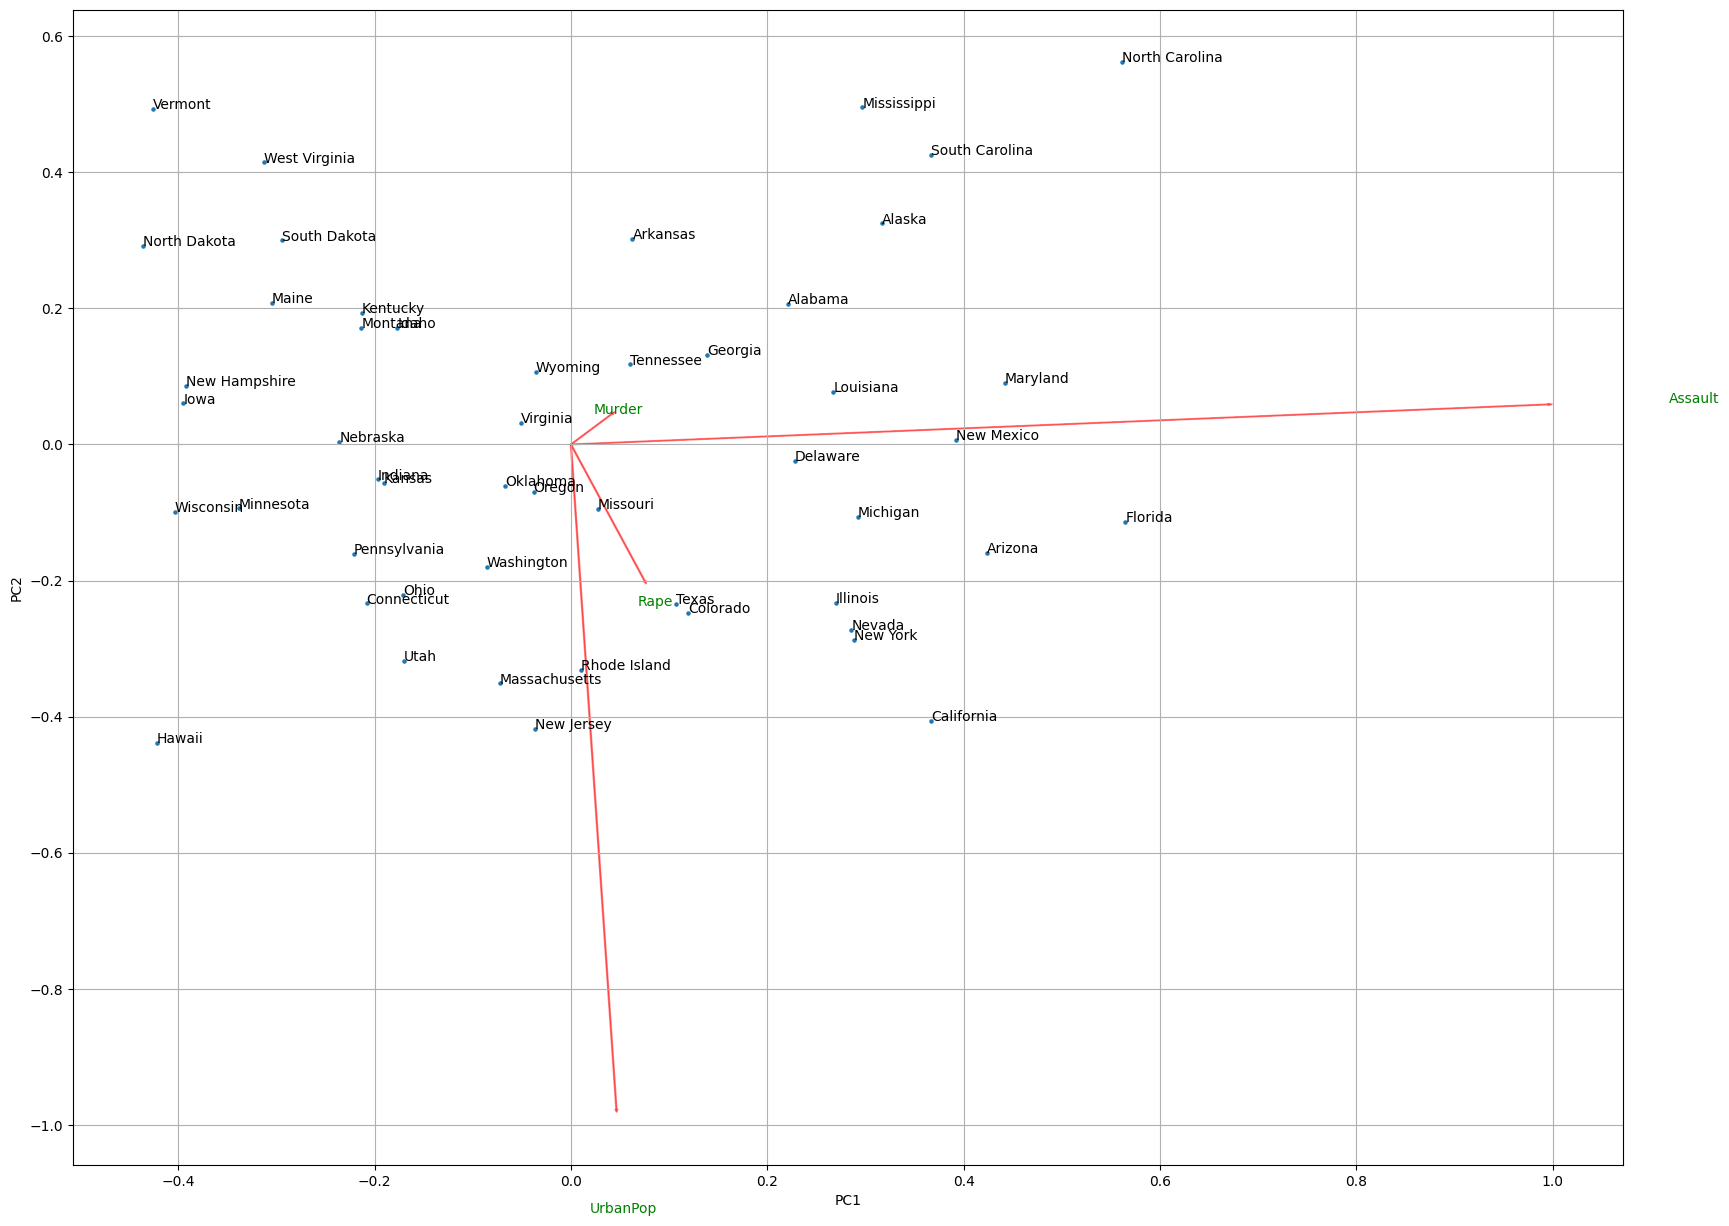

In [30]:
biplot(p_comp[:,0:2],np.transpose(pca.components_[0:2,:]),list(df.corr().columns), list(df.index))

The plot above shows that every dot corresponds to an observation from the original dataset. The x-axis and y-axis denote the principal components, with the x-axis representing the first principal component and the y-axis representing the second principal component.

The magnitude of the red line denotes the significance of each feature, which is consistent with the preview data frame, indicating that Assault is more important in PC1, whereas Urban Pop is more significant in PC2.

In [31]:
x_standardized = StandardScaler().fit_transform(x)

std_pca = PCA()
X_std_trans = std_pca.fit_transform(x_standardized)

df_std_pca = pd.DataFrame(X_std_trans,index=df.index)
df_std_pca.head()

,0,1,2,3
State,,,,
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


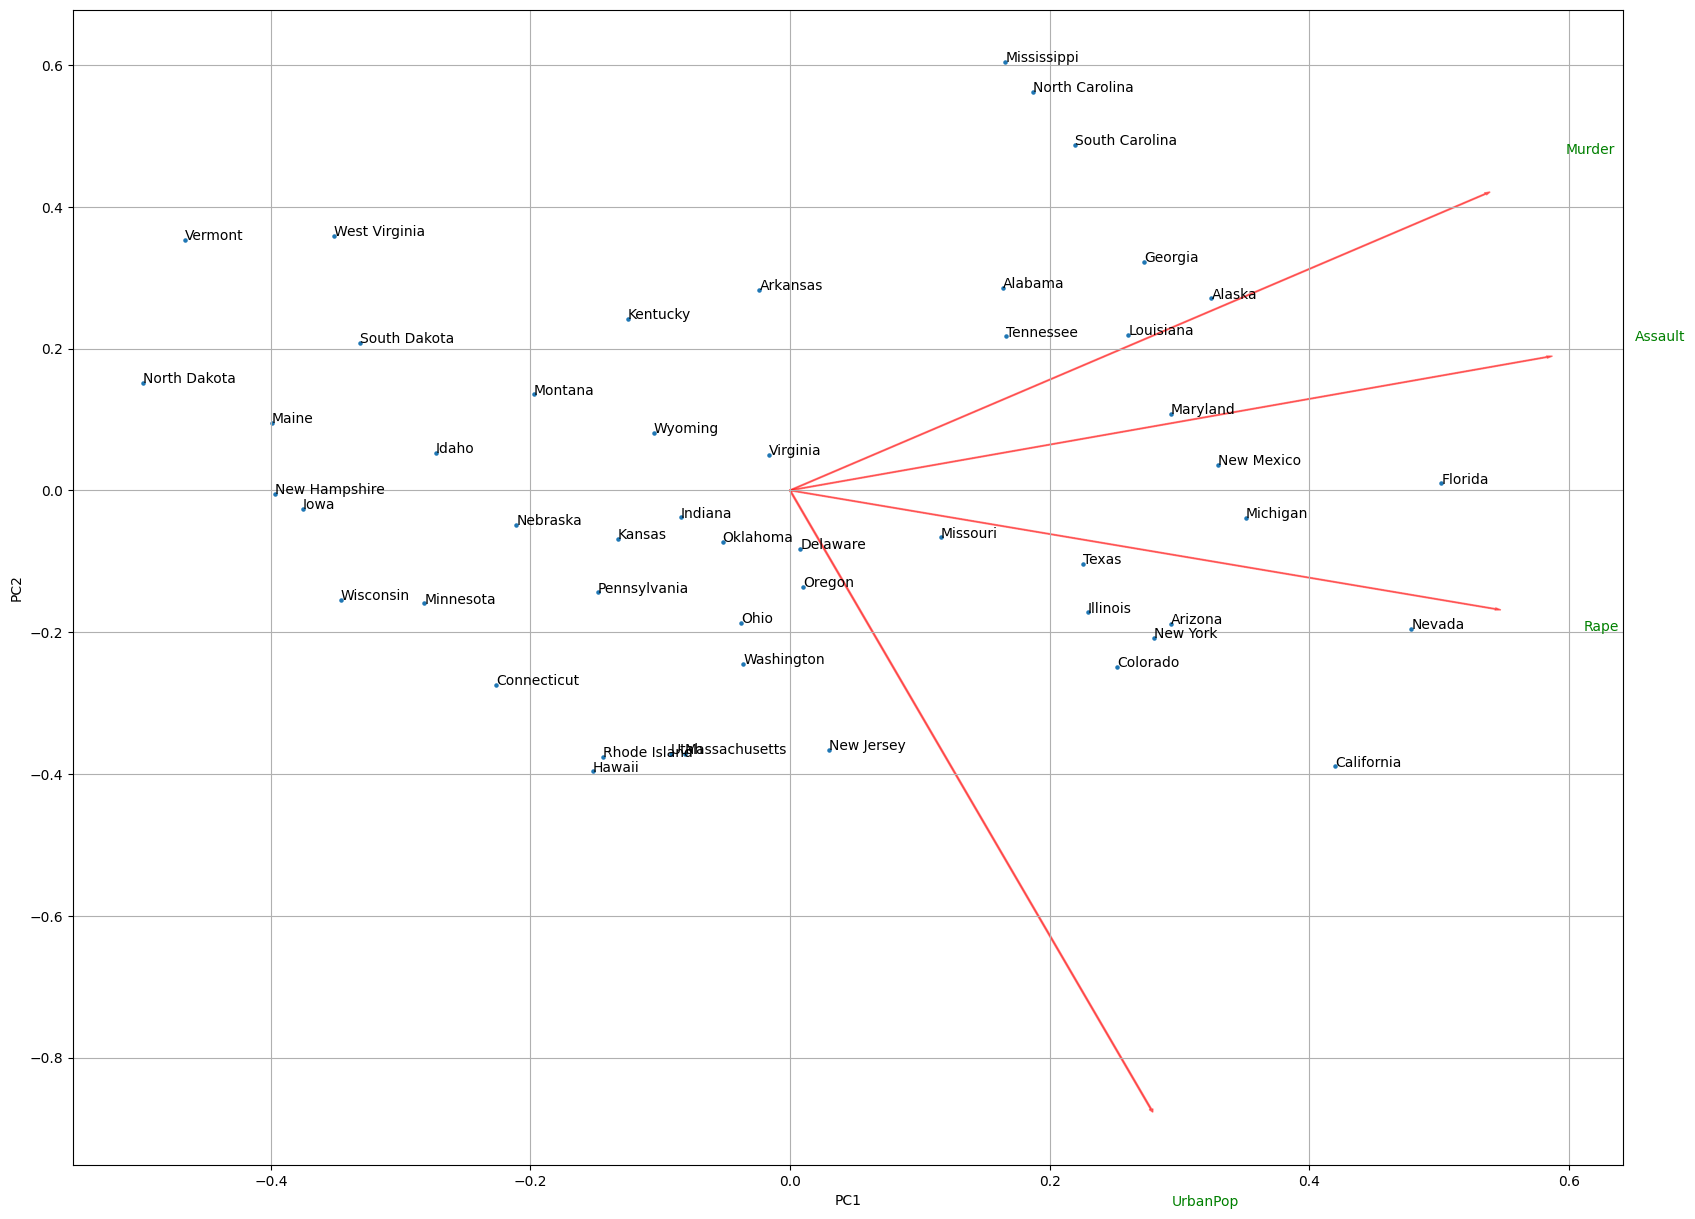

In [34]:
biplot(X_std_trans[:,0:2],np.transpose(std_pca.components_[0:2, :]),list(df.columns))
plt.show()

Upon examining the standardized data, we observe that significantly more variables are involved in describing the variance, as the influence of large values is no longer overwhelming.

Furthermore, we observe that most of the variables make a comparable contribution to the analysis, and that the distinct characteristics tend to cluster together in groups.


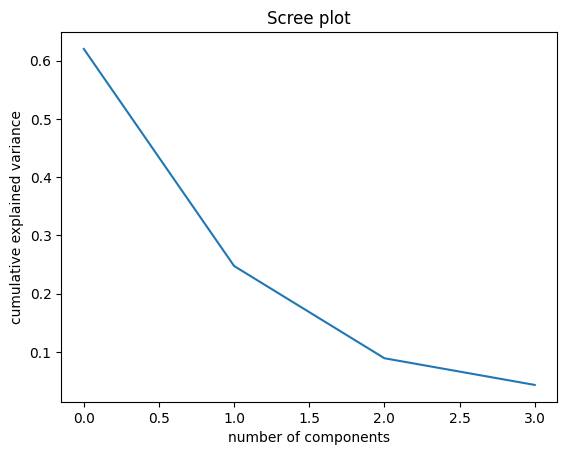

In [39]:
# Create elbow plot
target = (min(std_pca.explained_variance_ratio_) + max(std_pca.explained_variance_ratio_))*0.1

# Plot the scree plot 
plt.plot(std_pca.explained_variance_ratio_)

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Scree plot")
plt.show()

The scree plot illustrates that the initial three principal components collectively account for roughly 90% of the variance in the dataset. This implies that the majority of the essential information within the data can be captured by these three components, allowing for more straightforward and effective analyses.

By employing these three principal components, we can establish clusters or groups within the dataset, which can provide valuable insights into underlying patterns and relationships among the variables. These clusters can assist in making data-driven decisions and identifying trends or outliers that might have gone unnoticed otherwise.

In [41]:
# select the first three principal components 
pca_df = pd.DataFrame(X_std_trans[:,0:3],index=df.index)

In [42]:
# hierachical clustering
agc = AgglomerativeClustering().fit(pca_df)

With the aid of the dendrogram technique, we can visualize the Euclidean distance between the different clusters that have been formed. This allows us to choose an appropriate value for k, which represents the number of clusters generated from our data.

By examining the dendrogram, we can observe the distances between the different clusters at each stage of the merging process. This enables us to make informed decisions about where to cut the dendrogram, resulting in the desired number of clusters. Selecting the appropriate k value is essential in cluster analysis, as it has a significant impact on the accuracy and interpretability of the final results.

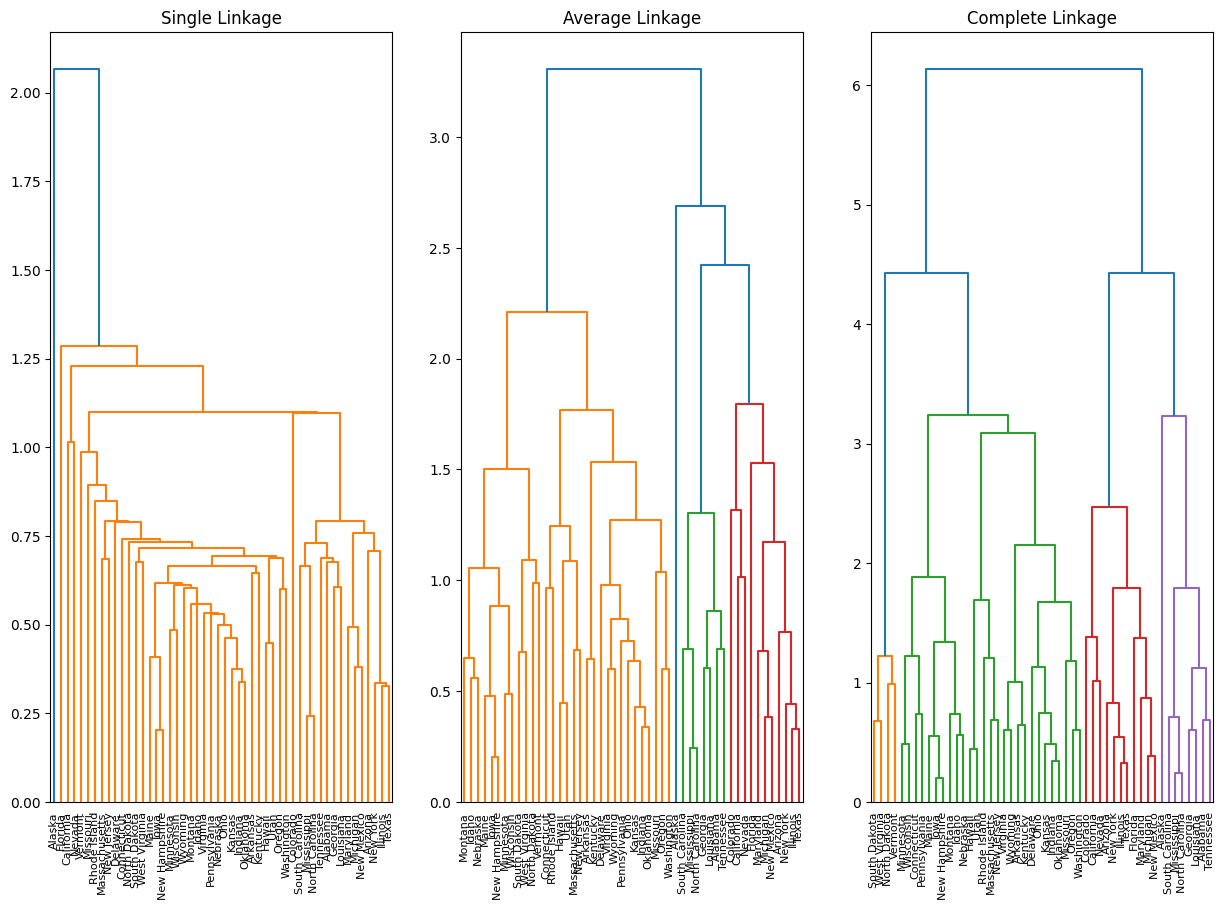

In [46]:
# plot dendrograms
fig,ax=plt.subplots(1,3,figsize=(15,10))
dendrogram(linkage(pca_df,method="single"),labels=pca_df.index,ax=ax[0])
ax[0].set_title("Single Linkage")
dendrogram(linkage(pca_df,method="average"),labels=pca_df.index,ax=ax[1])
ax[1].set_title("Average Linkage")
dendrogram(linkage(pca_df,method="complete"),labels=pca_df.index,ax=ax[2])
ax[2].set_title("Complete Linkage")
plt.show()

The linkage method employed in a dendrogram can have a significant impact on the resulting outcomes of the analysis. Different linkage methods, such as single linkage, complete linkage, or average linkage, can lead to different dendrograms and, consequently, different numbers and types of clusters.

In this case, we examined several dendrograms generated with different linkage methods and selected the one that provided the most balanced dispersion of clusters. Using the complete linkage method, we were able to identify four distinct clusters within the data. This approach allowed us to group together observations that had similar features and to identify patterns and relationships among the variables.

The resulting clusters can be analyzed further to uncover underlying trends or factors that may be influencing the data. Moreover, these clusters can be used to inform decision-making and to identify potential areas for further research or exploration.

# Kmeans
An alternative approach to clustering our data is by utilizing the K-means partitioning algorithm. However, this method requires us to specify the number of clusters we want to form. Fortunately, through the previous hierarchical clustering method, we were able to determine that there are four possible clusters within the data.

It is worth noting that the K-means method is a flat clustering technique, which means that all observations are assigned to a single cluster. To better visualize the clustering results, we can plot two examples of clustering using pairs of principal components. One example involves the first and second principal components, while the other involves the first and last principal components. These plots can aid in assessing the performance of the clustering algorithm and identifying any potential outliers or overlaps between clusters.

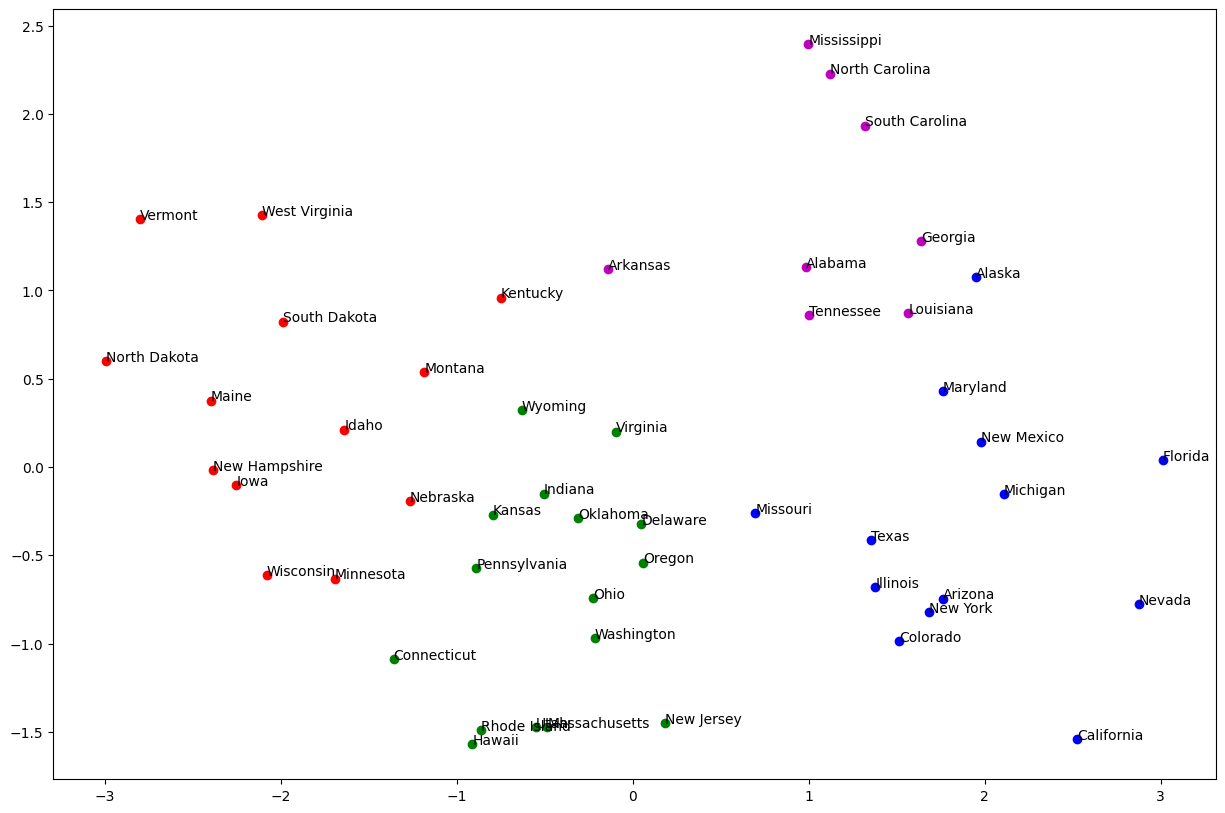

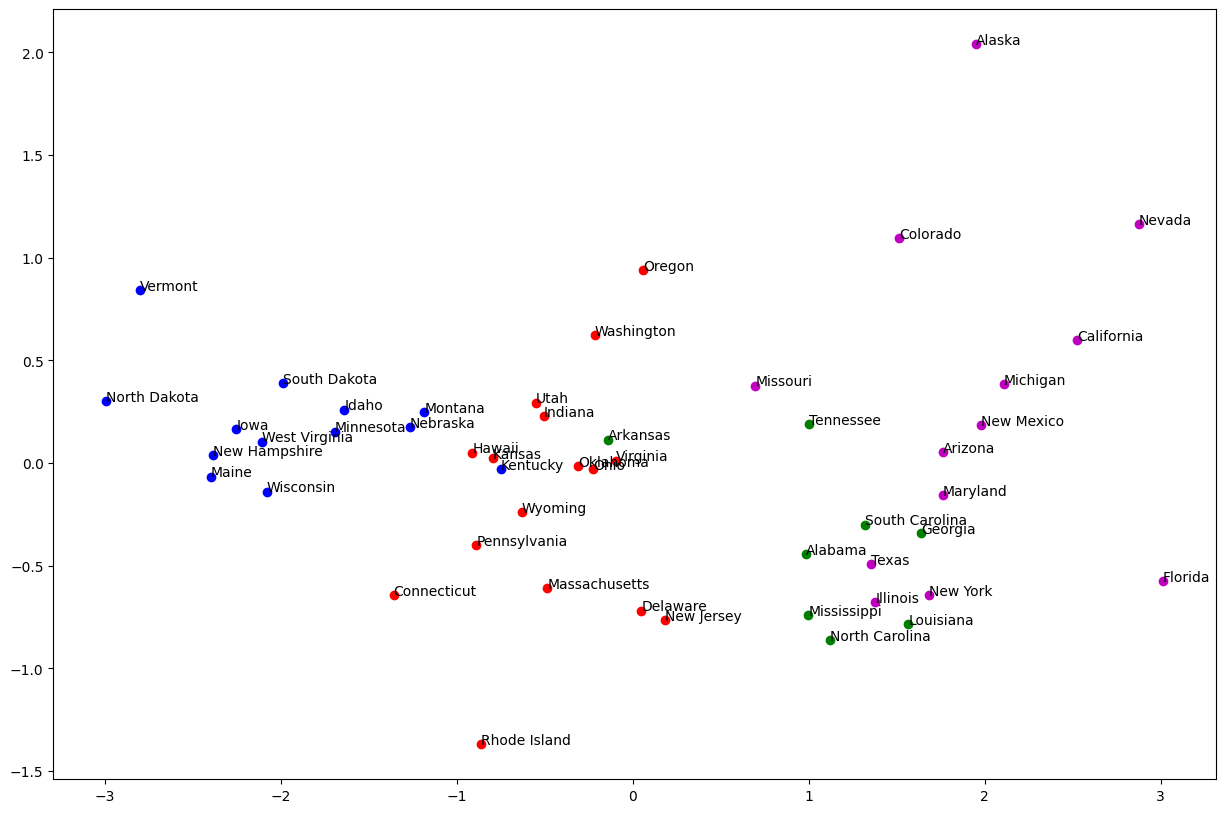

In [47]:
# kmeans clustering
def kmeans_clustering(pc1,pc2):
    k=4

    # Fit the model
    kmeans = KMeans(n_clusters=k, init='k-means++',n_init=10)
    cluster_labels = kmeans.fit_predict(pca_df)
    cent = kmeans.cluster_centers_

    # Plot clusters
    fig, ax = plt.subplots(figsize=(15,10))
    colours = 'rbgm'
    for i in range(0,k):
        ax.scatter(pc1[cluster_labels == i],pc2[cluster_labels == i],c = colours[i]) 

    for i in range(0,len(x)):
            txt = df.index[i]
            ax.annotate(txt, (pc1[i], pc2[i]))


# K means clustering for first with second principal components
# Extract the principal components 1 and 2
x = X_std_trans[:,0]
y = X_std_trans[:,1]

# Use the defined function to  cluter the data and plot the clusters
kmeans_clustering(x,y)

# Extract the principal components 1 and 3
x = X_std_trans[:,0]
y = X_std_trans[:,2]

# Use the defined function to cluster the data and plot the clusters
kmeans_clustering(x,y)

The first plot displays the four clusters that were formed based on the first two principal components. These clusters are defined by the overall rates of criminal activity across all states. We observe that the clusters are well-defined, which can be attributed to the fact that the first two principal components, as shown by the scree plot, explain a significant portion of the variance in the data (around 60 to 70%).

Based on this plot, we can identify four distinct classes of states:

- The first class is represented by the green points and corresponds to states with low rates of criminal activity.
- The second class is represented by the red points and corresponds to states with moderate rates of criminal activity.
- The third class is represented by the blue points and corresponds to states with high rates of criminal activity related to murder.
- The fourth class is represented by the magenta points and corresponds to states with high rates of criminal activity related to rape.

On the other hand, the plot that clusters the data based on the first and last principal components does not have as clearly defined clusters, as some clusters intersect with others. This indicates that the variance in the data explained by the first and last principal components is not sufficient to form well-separated clusters.